In [1]:
import re
import glob


import skipthoughts
import numpy as np
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE

from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances


In [2]:
model = skipthoughts.load_model()
encoder = skipthoughts.Encoder(model)

/home/arunhiremath/sfsu/nlt/text_summarization/skipthoughts/Text-Summarization/data/ /home/arunhiremath/sfsu/nlt/text_summarization/skipthoughts/Text-Summarization/data/uni_skip.npz
Loading model parameters...
<built-in method items of collections.OrderedDict object at 0x7f07091e4740>
<built-in method items of collections.OrderedDict object at 0x7f070886bac0>
Compiling encoders...
Loading tables...
/home/arunhiremath/sfsu/nlt/text_summarization/skipthoughts/Text-Summarization/data/
Packing up...


In [3]:
inputFiles = "/home/arunhiremath/sfsu/nlt/text_summarization/skipthoughts/Text-Summarization/data-set/news-summary/bbc-news-summary/BBC News Summary/News Articles/business"
goldSummaryFiles = "/home/arunhiremath/sfsu/nlt/text_summarization/skipthoughts/Text-Summarization/data-set/news-summary/bbc-news-summary/BBC News Summary/Summaries/business"
opinosis_train_test_dict_files = {}


In [4]:
#Get a list of all files from the opinosis data-set
from os import walk
from os.path import join
import os
import ntpath
def get_file_list(path):
    fileNames = []
    for (dirpath, dirnames, file_names) in walk(path):
        fileNames.extend(file_names)
        break;
    fileLists = []
    for fName in fileNames:
        fileLists.append(join(path,fName))
    return fileLists

In [5]:
test_data_set_files = get_file_list(inputFiles)
gold_summary_set_files = get_file_list(goldSummaryFiles)


In [6]:
column_=["key","location","gt-1","pd1", "pd2"]
allDataFrames = []
for tf, gf in zip(test_data_set_files, gold_summary_set_files):
    data_frame = ["None","None","None", "None", "None"]
    data_frame[0]=os.path.splitext(os.path.basename(tf))[0]
    data_frame[1]=tf
    data_frame[2]=gf
    allDataFrames.append(data_frame)

In [7]:
dfObj = pd.DataFrame(allDataFrames, columns = column_)
dfObj.head(10)

,key,location,gt-1,pd1,pd2
0,058,/home/arunhiremath/sfsu/nlt/text_summarization...,/home/arunhiremath/sfsu/nlt/text_summarization...,None,None
1,434,/home/arunhiremath/sfsu/nlt/text_summarization...,/home/arunhiremath/sfsu/nlt/text_summarization...,None,None
2,103,/home/arunhiremath/sfsu/nlt/text_summarization...,/home/arunhiremath/sfsu/nlt/text_summarization...,None,None
3,227,/home/arunhiremath/sfsu/nlt/text_summarization...,/home/arunhiremath/sfsu/nlt/text_summarization...,None,None
4,149,/home/arunhiremath/sfsu/nlt/text_summarization...,/home/arunhiremath/sfsu/nlt/text_summarization...,None,None
5,172,/home/arunhiremath/sfsu/nlt/text_summarization...,/home/arunhiremath/sfsu/nlt/text_summarization...,None,None
6,299,/home/arunhiremath/sfsu/nlt/text_summarization...,/home/arunhiremath/sfsu/nlt/text_summarization...,None,None
7,450,/home/arunhiremath/sfsu/nlt/text_summarization...,/home/arunhiremath/sfsu/nlt/text_summarization...,None,None
8,309,/home/arunhiremath/sfsu/nlt/text_summarization...,/home/arunhiremath/sfsu/nlt/text_summarization...,None,None
9,339,/home/arunhiremath/sfsu/nlt/text_summarization...,/home/arunhiremath/sfsu/nlt/text_summarization...,None,None


In [8]:
for index, rows in dfObj.iterrows():
    kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
    demoFile = open(rows["location"], "rt", encoding="utf8", errors='ignore')
    text = demoFile.read()
    sentences = sent_tokenize(text)
    #pp_Sentences  = sentence_preprocessor(sentences, embedding_word_list)
    embedding_clusters = []
    sentence_clusters  = {}
    for i,s in enumerate(sentences):
        vector = encoder.encode([s], verbose=False)
        embedding_clusters.append(vector[:,:])
        sentence_clusters[i] = s
    embedding_clusters = np.array(embedding_clusters)
    n,m,k = embedding_clusters.shape
    embedding_clusters_asa = embedding_clusters.reshape(n * m, k)
    print(embedding_clusters.shape)
    print(embedding_clusters_asa.shape)
    kmeans_fit = kmeans.fit(embedding_clusters_asa)
    label_set = list(set(kmeans_fit.labels_))
    centroids = kmeans_fit.cluster_centers_
    centroidCount = 0
    predicted_summary_list = []
    print("-------------------------------------------------------------------------Summary-Data")
    for label in label_set:
        clusterSet = embedding_clusters_asa[kmeans_fit.labels_ == label]
        euclidianDist =  distance.cdist(centroids[centroidCount:centroidCount+1,:],clusterSet,'euclidean')
        distanceArray = (np.argsort(euclidianDist)).tolist()
        print(sentence_clusters[distanceArray[0][0]])
        predicted_summary_list.append(sentence_clusters[distanceArray[0][0]])
        centroidCount= centroidCount + 1
    rows["pd1"] = predicted_summary_list
    
#print(len(sentence_list))

(11, 1, 4800)
(11, 4800)
-------------------------------------------------------------------------Summary-Data
The company said it was speeding up its restructuring programme, which aims to save between £190m and £265m annually from 2009.
The Swedish firm, the world's largest maker of home appliances, said it is to relocate about 10 of its 27 plants in western Europe and North America.
(27, 1, 4800)
(27, 4800)
-------------------------------------------------------------------------Summary-Data
Donor nations have promised to give $717m (£379m) in disaster relief over the next six months, according to the United Nations.
Other countries believe their economies are strong enough to cope or wish to avoid being viewed as credit risks.
(20, 1, 4800)
(20, 4800)
-------------------------------------------------------------------------Summary-Data
New York Attorney General Elliot Spitzer sued the company, accusing it of receiving illegal payments to steer clients to selected firms as well as r

KeyboardInterrupt: 

-------------------------------------------------------------------------Summary-Data
The UK's deficit with the EU fell to £1.9bn from £2.1bn, while its non-EU shortfall dropped to £2.7bn from £2.9bn in October.
Trade gap narrows as exports rise

The UK's trade gap narrowed in November, helped by a 7.5% rise in exports outside the European Union.
(14, 1, 4800)
(14, 4800)
-------------------------------------------------------------------------Summary-Data
It believes the prospectus for a bond issue was unclear and that executives may have had privileged information.
The watchdog is said to believe the executive pair were party to "privileged information" surrounding the issue of the bonds.
(11, 1, 4800)
(11, 4800)
-------------------------------------------------------------------------Summary-Data
Inbev brands include Bass, Stella Artois, Hoegaarden and Staropramen.
Inbev bought out another partner in August 2004.
(14, 1, 4800)
(14, 4800)
----------------------------------------------

KeyboardInterrupt: 

In [ ]:
#save the output to csv
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
fileName = "news_articles_data_4800_dimension" + timestr + ".csv"
dfObj.to_csv(fileName)

In [ ]:
dfObj["gt-1"][1]

In [37]:
dfObj["pd1"][1]

['Other countries believe their economies are strong enough to cope or wish to avoid being viewed as credit risks.',
 'Donor nations have promised to give $717m (£379m) in disaster relief over the next six months, according to the United Nations.']

In [41]:
def convert_to_2d(embedding_clusters):
    embedding_clusters = np.array(embedding_clusters)
    n,m,k = embedding_clusters.shape
    embedding_clusters_asa = embedding_clusters.reshape(n * m, k)
    print(embedding_clusters.shape)
    print(embedding_clusters_asa.shape)
    tsne_model_en_2d = TSNE(n_iter=5000)
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters_asa))
    print(embeddings_en_2d.shape)
    return embeddings_en_2dx

<IPython.core.display.Javascript object>


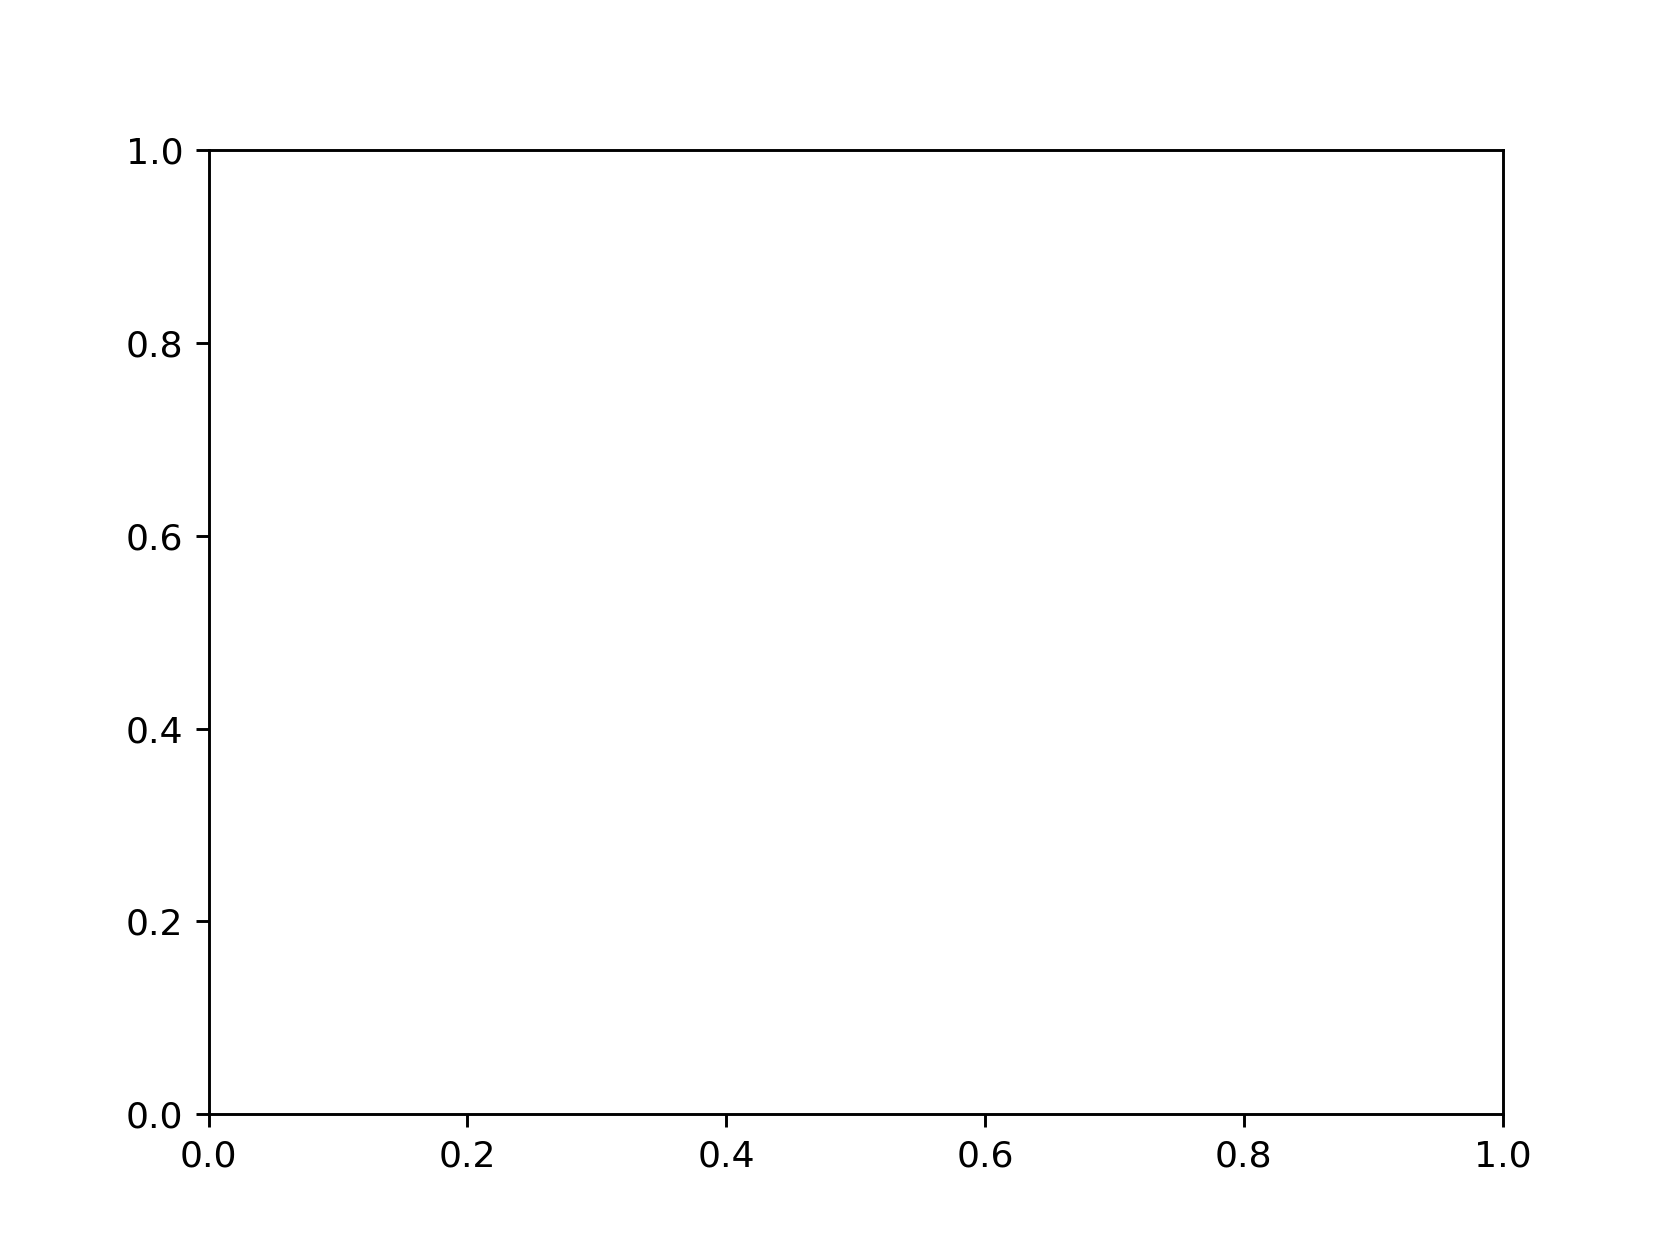

In [42]:
fig = plt.figure()
ax1 = fig.add_subplot(111)